In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = np.loadtxt("ex1data2.txt",dtype=np.int, delimiter=',')
data

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900],
       [  1985,      4, 299900],
       [  1534,      3, 314900],
       [  1427,      3, 198999],
       [  1380,      3, 212000],
       [  1494,      3, 242500],
       [  1940,      4, 239999],
       [  2000,      3, 347000],
       [  1890,      3, 329999],
       [  4478,      5, 699900],
       [  1268,      3, 259900],
       [  2300,      4, 449900],
       [  1320,      2, 299900],
       [  1236,      3, 199900],
       [  2609,      4, 499998],
       [  3031,      4, 599000],
       [  1767,      3, 252900],
       [  1888,      2, 255000],
       [  1604,      3, 242900],
       [  1962,      4, 259900],
       [  3890,      3, 573900],
       [  1100,      3, 249900],
       [  1458,      3, 464500],
       [  2526,      3, 469000],
       [  2200,      3, 475000],
       [  2637,      3, 299900],
       [  

In [103]:
x = data[:, :2]
y = data[:, 2]
m = np.size(y)

In [126]:
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)

In [125]:
X = np.zeros((m, 2))
for i in range(2):
    X[:, i] = (x[:, i] - mu[i])/sigma[i]

In [257]:
theta = np.zeros((3))
alpha = 0.1
iterations = 50
costJ = []
h = theta[0] + theta[1] * X[:,0] + theta[2] * X[:, 1]
for i in range(iterations):
    t1 = theta[0] - (alpha/m) * sum(h - y)
    t2 = theta[1] - (alpha/m) * sum((h - y) * X[:, 0])
    t3 = theta[2] - (alpha/m) * sum((h - y) * X[:, 1])
    theta[0] = t1
    theta[1] = t2
    theta[2] = t3
    J = sum((h - y)**2)/(2*m)
    costJ.append(J)
    h = theta[0] + theta[1] * X[:,0] + theta[2] * X[:, 1]

In [258]:
theta

array([338658.2492493 , 103322.82942954,   -474.74249522])

In [262]:
k=np.array([1650, 3])
price = theta[0] + sum(theta[1:] * ((k-mu)/sigma))
price

292679.0716800462

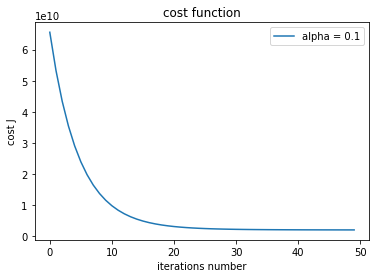

In [265]:
plt.plot(list(range(iterations)), costJ)
plt.legend(labels=['alpha = 0.1'])
plt.xlabel("iterations number")
plt.ylabel("cost J")
plt.title("cost function")
plt.show()

__Next: Normal Equations__

m: number of each feature'training data

n: number of features

In [296]:
Xm = np.hstack(( np.mat(np.ones((m, 1))), np.mat(x)))
theta_nEqn = ((Xm.T)*Xm).I * Xm.T * np.mat(y).T
theta_nEqn

matrix([[89597.9095428 ],
        [  139.21067402],
        [-8738.01911233]])

In [303]:
th = np.array(theta_nEqn).reshape(3)
price1 = th[0] + sum(th[1:] * k)
price1

293081.46433489484